In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import  DecisionTreeClassifier

from sklearn import utils
from sklearn import preprocessing
from sklearn import metrics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/who-suicide-statistics/who_suicide_statistics.csv


#### baca data csv

In [114]:
df = pd.read_csv('/kaggle/input/who-suicide-statistics/who_suicide_statistics.csv')
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [115]:
df.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


 #### tampilkan kolom, tipe data

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


 #### hapus null

In [117]:
df.dropna(inplace=True)

#### angka bunuh diri tiap negara

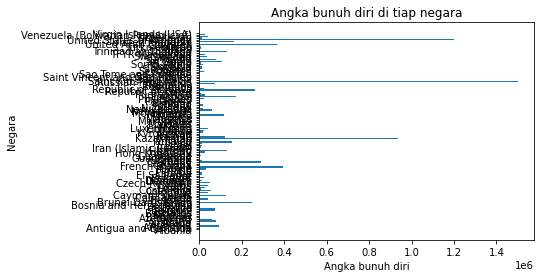

In [118]:
negara = df.groupby('country')['suicides_no'].sum()
negara

plt.barh(negara.index, negara)
plt.xlabel('Angka bunuh diri')
plt.ylabel('Negara')
plt.title('Angka bunuh diri di tiap negara')
plt.show()

#### 10 negara dg angka bunuh diri tertinggi

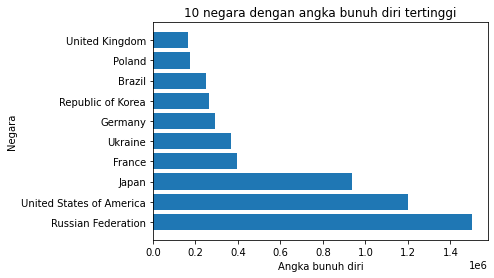

In [119]:
negara_max = df.groupby('country')['suicides_no'].sum().nlargest(10)
negara_max

plt.barh(negara_max.index, negara_max)
plt.xlabel('Angka bunuh diri')
plt.ylabel('Negara')
plt.title('10 negara dengan angka bunuh diri tertinggi')
plt.show()

#### angka bunuh diri pertahun

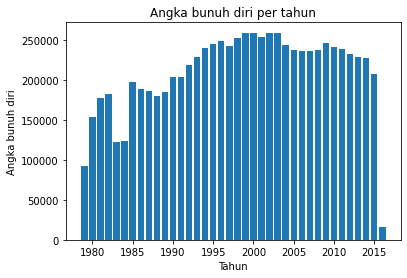

In [120]:
tahun = df.groupby(['year'])['suicides_no'].sum()
tahun


plt.bar(tahun.index, tahun)
plt.ylabel('Angka bunuh diri')
plt.xlabel('Tahun')
plt.title('Angka bunuh diri per tahun')
plt.show()

#### 10 tahun dg angka bunuh diri tertinggi

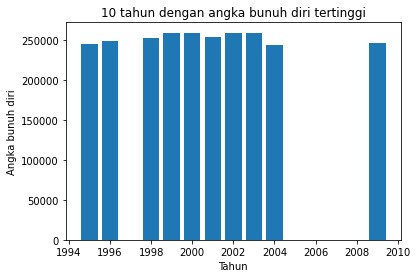

In [121]:
tahun_max = df.groupby(['year'])['suicides_no'].sum().nlargest(10)
tahun_max


plt.bar(tahun_max.index, tahun_max)
plt.ylabel('Angka bunuh diri')
plt.xlabel('Tahun')
plt.title('10 tahun dengan angka bunuh diri tertinggi')
plt.show()

#### angka bunuh diri tiap jenis kelamin

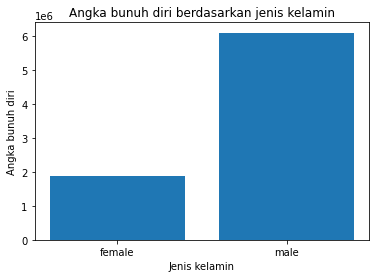

In [122]:
jenis_kelamin = df.groupby('sex')['suicides_no'].sum()
jenis_kelamin

plt.bar(jenis_kelamin.index, jenis_kelamin)
plt.ylabel('Angka bunuh diri')
plt.xlabel('Jenis kelamin')
plt.title('Angka bunuh diri berdasarkan jenis kelamin')
plt.show()

#### angka bunuh diri berdasarkan umur

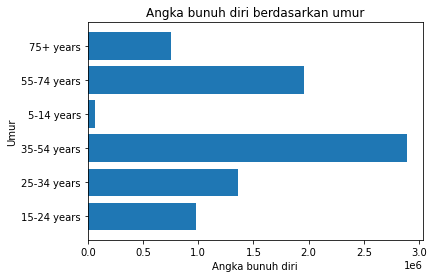

In [123]:
umur = df.groupby('age')['suicides_no'].sum()
umur

plt.barh(umur.index, umur)
plt.xlabel('Angka bunuh diri')
plt.ylabel('Umur')
plt.title('Angka bunuh diri berdasarkan umur')
plt.show()

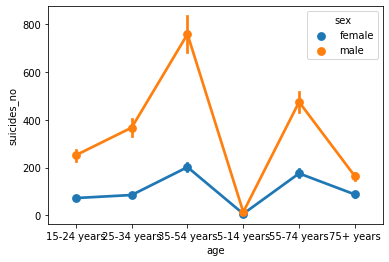

In [124]:
sns.pointplot(x='age', y='suicides_no', hue='sex', data=df)

#### perbandingan angka bunuh diri dg populasi

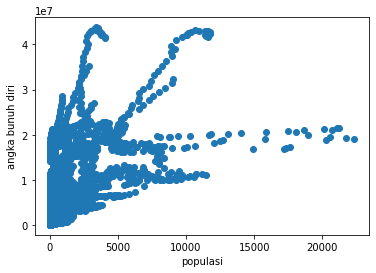

In [125]:
fig, ax = plt.subplots()
ax.scatter(df["suicides_no"], df["population"])
ax.set_xlabel("populasi")
ax.set_ylabel("angka bunuh diri")
plt.show()

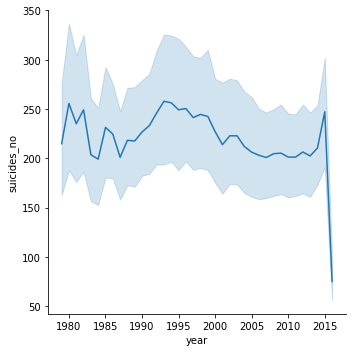

In [126]:
sns.relplot(x="year", y="suicides_no", data=df, kind="line")
plt.show()

#### ubah data jadi int

In [127]:
df1=df
df1=df1.drop(['country'],axis=1)

df1['age']=df1['age'].replace('5-14 years',0)
df1['age']=df1['age'].replace('15-24 years',1)
df1['age']=df1['age'].replace('25-34 years',2)
df1['age']=df1['age'].replace('35-54 years',3)
df1['age']=df1['age'].replace('55-74 years',4)
df1['age']=df1['age'].replace('75+ years',5)
df1['sex']=df1['sex'].replace('male',0)
df1['sex']=df1['sex'].replace('female',1)

df1['bunuhDiri/100kPopulation']=(df1.suicides_no/df1.population)/100000
df1['fatality_rate']=np.where(df1['bunuhDiri/100kPopulation']>df1['bunuhDiri/100kPopulation'].mean(),0,1)

#### memisahkan data train dan test

In [128]:
x = np.array(df1.drop(['fatality_rate', 'bunuhDiri/100kPopulation'], 1))
y = np.array(df1.fatality_rate)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=45)

label_enc=preprocessing.LabelEncoder()
trs=label_enc.fit_transform(y_train)

print("Shape of x_train: ",x_train.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of x_test: ",x_test.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (27045, 5)
Shape of y_train:  (27045,)
Shape of x_test:  (9015, 5)
Shape of y_test:  (9015,)


In [129]:
def age_cat(age) :
    if age < 2:
        return 'Young'
    elif 2 < age < 4:
        return 'Adult'
    else:
        return 'Senior'
    
# df1['age'] = df1.fillna(df1['age'].mean())
df1['age_cat'] = df1['age'].apply(age_cat)
df1.head(20)
    

,year,sex,age,suicides_no,population,bunuhDiri/100kPopulation,fatality_rate,age_cat
24,1987,1,1,14.0,289700.0,4.832585e-10,1,Young
25,1987,1,2,4.0,257200.0,1.555210e-10,1,Senior
26,1987,1,3,6.0,278800.0,2.152080e-10,1,Adult
27,1987,1,0,0.0,311000.0,0.000000e+00,1,Young
28,1987,1,4,0.0,144600.0,0.000000e+00,1,Senior
29,1987,1,5,1.0,35600.0,2.808989e-10,1,Senior
30,1987,0,1,21.0,312900.0,6.711409e-10,1,Young
31,1987,0,2,9.0,274300.0,3.281079e-10,1,Senior
32,1987,0,3,16.0,308000.0,5.194805e-10,1,Adult
33,1987,0,0,0.0,338200.0,0.000000e+00,1,Young


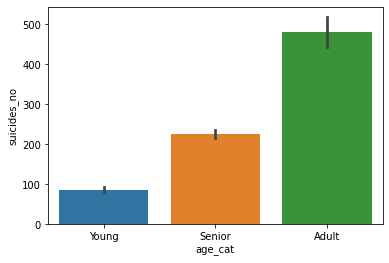

In [130]:
sns.barplot(x='age_cat', y='suicides_no', data=df1)

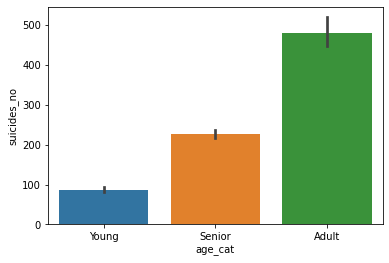

In [131]:
sns.barplot(x='age_cat', y='suicides_no', data=df1)

#### Logictic Regression

In [132]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

99.91

#### Support Vector Machine

In [133]:
svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
acc_svc

68.93

#### Linear SVC

In [134]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)
acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.6/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


76.03

#### Gaussian Naive Bayes

In [135]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_test)
acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
acc_gaussian

72.17

#### Decision tree regressor

In [136]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)
y_pred = decision_tree.predict(x_test)
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
acc_decision_tree

100.0

#### Random forest classifier

In [137]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)
random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
acc_random_forest

100.0

In [140]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machine', 'Linear SVC', 'Gaussian Naive Bayes', 'Decision Tree Regressor', 'Random Forest Classifier'],
    'Score': [acc_log, acc_svc, acc_linear_svc, acc_gaussian, acc_decision_tree, acc_random_forest]
})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree Regressor,100.00
5,Random Forest Classifier,100.00
0,Logistic Regression,99.91
2,Linear SVC,76.03
3,Gaussian Naive Bayes,72.17
1,Support Vector Machine,68.93


In [141]:
submission = pd.DataFrame({
    'suicides_no': df1['suicides_no'],
    'age': y_pred
})
submission

ValueError: array length 9015 does not match index length 36060